# Decision Trees

**Decision Trees** are fundamentally *data-driven machine learning models* that function by taking an input $X$ and producing an output $Y$. Their versatility lies in their ability to handle both *regression problems* (where the output is a numerical value) and *classification problems* (where the output is a categorical class). What makes decision trees particularly powerful is their remarkable capacity to fit complex data patterns with high precision.

A crucial characteristic of decision trees is their ability to achieve *zero training error* in classification tasks. This relates to the concept of **VC dimension** (Vapnik-Chervonenkis dimension), which in the case of decision trees is infinite. This infinite VC dimension essentially means that unpruned decision trees possess unlimited learning capacity - they can perfectly classify any training dataset, regardless of its complexity. An *unpruned decision tree* refers to a tree that's allowed to grow without restrictions, enabling it to create as many branches and splits as necessary to perfectly fit the training data.

The training of decision trees is accomplished through the **CART (Classification and Regression Tree) algorithm**, which is a greedy optimization approach. The term "greedy" here means that the algorithm makes the locally optimal choice at each step, hoping to find a global optimum. Due to the use of this algorithm, decision trees are sometimes referred to as "CART models." The CART algorithm works by repeatedly splitting the data into subsets based on the most significant features, creating a tree-like structure where each node represents a decision point.

It's important to note that while the ability to perfectly fit training data might sound ideal, it can potentially lead to *overfitting* - where the model performs excellently on training data but poorly on new, unseen data. This is why in practical applications, decision trees are often pruned or used as part of ensemble methods (like Random Forests) to achieve better generalization.

The model's architecture allows it to capture complex relationships in data through a hierarchical structure of if-then rules, making it both powerful and interpretable. Each path from the root to a leaf node in the tree represents a unique combination of decisions that lead to a particular outcome, whether that's a class label in classification or a numerical value in regression problems.

For tabular data, state of the art model is gradient boosted tree models.

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame for better understanding
iris_df = pd.DataFrame(
    data=iris.data, 
    columns=iris.feature_names
)

# Add target column
iris_df['target'] = iris.target

# Map target values to target names for better readability
iris_df['target_name'] = iris_df['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Display the first few rows of the dataset
print("Iris Dataset (first 5 rows):")
print(iris_df.head())

# Explanation
print("\nDataset Explanation:")
print("1. Features:")
print("   - Sepal length (cm): Length of the sepal")
print("   - Sepal width (cm): Width of the sepal")
print("   - Petal length (cm): Length of the petal")
print("   - Petal width (cm): Width of the petal")
print("2. Target classes:")
print("   - 0: Setosa")
print("   - 1: Versicolor")
print("   - 2: Virginica")
print("3. The dataset has 150 samples, each belonging to one of the three classes.")

# Summary of the dataset
print("\nDataset Summary:")
print(iris_df.describe(include='all'))

Iris Dataset (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Dataset Explanation:
1. Features:
   - Sepal length (cm): Length of the sepal
   - Sepal width (cm): Width of the sepal
   - Petal length (cm): Length of the petal
   - Petal width (cm): Width of the petal
2. Target classes:
   - 0: Setosa
   - 1: Versicolor
   - 2: Virginica
3. The dataset has 150 samples, each belonging to one of the three classes

In [2]:
# print the total number of samples in each class
print("\nNumber of samples in each class:")
print(iris_df['target_name'].value_counts())


Number of samples in each class:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## Feature Importance Analysis in Tabular Data: A Comprehensive Guide

### Introduction

When working with tabular data, determining which features (columns) are truly important for your analysis or model is crucial for several reasons: it can improve model performance, reduce computational complexity, and provide better insights into your data. Here's a systematic approach to identifying important features in your dataset.

### Statistical Methods

#### 1. Correlation Analysis
- Calculate correlation coefficients (like Pearson, Spearman, or Kendall) between features and target variable
- Create correlation matrices to visualize relationships
- Look for features with:
  * Strong correlation with target (potential important predictors)
  * High correlation with other features (potential redundancy)

#### 2. Statistical Tests
- Chi-square test for categorical variables
- ANOVA for numerical variables
- T-tests for binary classification problems
- P-value analysis to determine statistical significance

### Machine Learning Based Methods

#### 1. Feature Importance from Tree-based Models
```python
from sklearn.ensemble import RandomForestClassifier
# Train model
rf_model = RandomForestClassifier()
rf_model.fit(X, y)
# Get importance scores
importances = rf_model.feature_importances_
```
Tree-based models like Random Forests and Decision Trees provide built-in feature importance metrics based on:
- Information gain
- Gini importance
- Mean decrease in impurity

#### 2. LASSO and Ridge Regression
- Use L1 (LASSO) regularization to force less important feature coefficients to zero
- Analyze coefficient values to determine feature importance
- Features with non-zero coefficients after LASSO are typically important

#### 3. Permutation Importance
This method measures importance by:
1. Training a model
2. Randomly shuffling each feature's values
3. Measuring the decrease in model performance
4. Features causing larger performance drops are more important

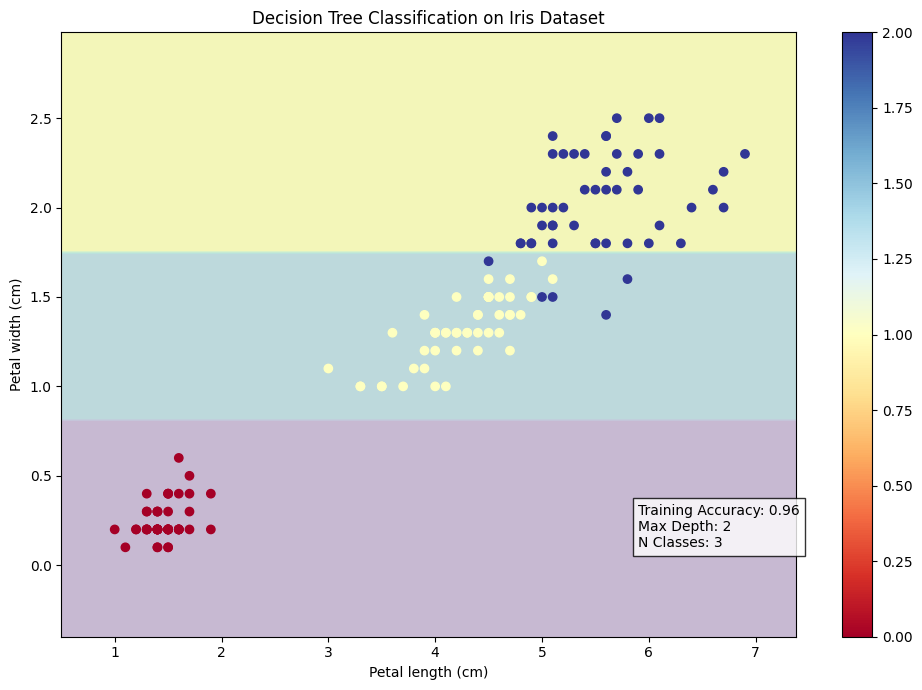


Feature Importance:
Petal Length: 0.0
Petal Width: 1.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and petal width
y = iris.target

# Create and train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# Create a mesh grid to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    # Set min and max values with some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Make predictions for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create color plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.title(title)
    plt.colorbar(scatter)
    
    # Show decision tree details
    n_classes = len(np.unique(y))
    training_accuracy = model.score(X, y)
    plt.text(x_max - 1.5, y_min + 0.5, 
            f'Training Accuracy: {training_accuracy:.2f}\n'
            f'Max Depth: {model.max_depth}\n'
            f'N Classes: {n_classes}',
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, tree_clf, 'Decision Tree Classification on Iris Dataset')

# Print feature importance
print("\nFeature Importance:")
print("Petal Length:", tree_clf.feature_importances_[0])
print("Petal Width:", tree_clf.feature_importances_[1])

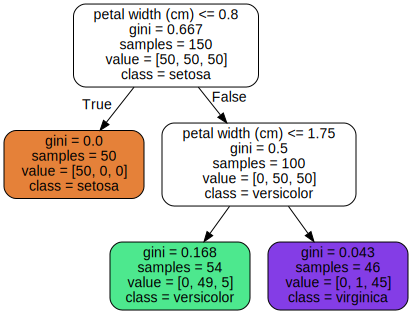

In [4]:
# Plot the decision tree
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
with open("iris_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [5]:
# Print the accuracy of the model
print("\nModel Accuracy:")
print(tree_clf.score(X, y))

# Print the importance of each feature
print("\nFeature Importance:")
for feature, importance in zip(iris.feature_names, tree_clf.feature_importances_):
    print(f"{feature}: {importance}")


Model Accuracy:
0.96

Feature Importance:
sepal length (cm): 0.0
sepal width (cm): 1.0


## CART Algorithm and Gini Impurity

### 1. Introduction to CART
CART (Classification and Regression Trees) is a machine learning algorithm used for constructing decision trees. It can be applied to both classification and regression tasks. The main goal is to split the dataset into subsets (or regions) that are as pure as possible.

#### Key Features of CART:
1. **Binary Splits**: Each decision node in a CART tree splits the dataset into two parts.
2. **Impurity Measures**: For classification, CART uses Gini Impurity to decide splits. For regression, it minimizes variance (or Mean Squared Error).
3. **Greedy Algorithm**: CART selects the best split at each node using a greedy approach that maximizes Information Gain.
4. **Pruning**: CART includes mechanisms to reduce overfitting by pruning the tree.

### 2. Gini Impurity
**Gini Impurity** is a metric to measure the degree of class mixing (or impurity) at a node. Lower Gini values indicate purer nodes, where most samples belong to one class.

#### Formula:
$$
Gini = 1 - \sum_{i=1}^{n} p_i^2
$$
Where:
- $n$ = number of classes.
- $p_i$ = proportion of samples in class \(i\).

### Properties:
- $Gini = 0$: Perfect purity (all samples belong to a single class).
- $Gini = 1 - \frac{1}{k}$: Maximum impurity when classes are equally distributed (for $k$ classes).

### 3. Information Gain
CART splits nodes by maximizing **Information Gain**, which is the reduction in impurity after a split. It uses a pair $(x_k, t_k)$ where $x_k$ is a feature and $t_k$ is a threshold and select the one maximises information gain.

#### Information Gain Formula:
$$
InfoGain = Gini_{parent} - \left( w_{left} \cdot Gini_{left} + w_{right} \cdot Gini_{right} \right)
$$
Where:
- $w_{left}$ and $w_{right}$ are the weights (proportion of samples) for the left and right child nodes.
- $Gini_{parent}$, $Gini_{left}$, and $Gini_{right}$ are the Gini impurities of the parent and child nodes.

### 4. CART Process Overview
1. **Splitting Criteria**:
   - Evaluate all possible splits for each feature.
   - Calculate Gini Impurity for each split.
   - Select the split with the highest Information Gain.
2. **Recursive Splitting**:
   - Apply the splitting process recursively on child nodes until stopping conditions are met.
3. **Stopping Conditions**:
   - Pure nodes (Gini = 0).
   - Maximum depth reached.
   - Minimum number of samples in a node.

### 5. Example: Analyzing the Provided Decision Tree

#### Tree Description:
The decision tree uses the Iris dataset to classify samples into three classes: Setosa, Versicolor, and Virginica. The splits are based on two features: `petal length` and `petal width`.

#### Root Node
- **Condition**: `petal length (cm) ≤ 2.45`
- **Samples**: 150
- **Value**: [50, 50, 50] (Setosa, Versicolor, Virginica)
- **Gini Impurity**:
  $$
  Gini = 1 - \left( \left(\frac{50}{150}\right)^2 + \left(\frac{50}{150}\right)^2 + \left(\frac{50}{150}\right)^2 \right)
  = 1 - (0.333^2 + 0.333^2 + 0.333^2)
  = 1 - 0.333
  = 0.667
  $$
- **Predicted Class**: Setosa

#### Left Subtree (True Path)
- **Condition**: `petal length ≤ 2.45`
- **Samples**: 50
- **Value**: [50, 0, 0]
- **Gini Impurity**:
  $$
  Gini = 1 - \left( \left(\frac{50}{50}\right)^2 + \left(\frac{0}{50}\right)^2 + \left(\frac{0}{50}\right)^2 \right)
  = 1 - (1^2 + 0^2 + 0^2)
  = 0
  $$
- **Predicted Class**: Setosa
- **Node Type**: Leaf Node (perfect purity, no further splits required).

#### Right Subtree (False Path)
- **Condition**: `petal width (cm) ≤ 1.75`
- **Samples**: 100
- **Value**: [0, 50, 50]
- **Gini Impurity**:
  $$
  Gini = 1 - \left( \left(\frac{0}{100}\right)^2 + \left(\frac{50}{100}\right)^2 + \left(\frac{50}{100}\right)^2 \right)
  = 1 - (0^2 + 0.5^2 + 0.5^2)
  = 1 - 0.5
  = 0.5
  $$
- **Predicted Class**: Versicolor (majority class by default).

#### Left Child of Right Subtree
- **Condition**: `petal width ≤ 1.75`
- **Samples**: 54
- **Value**: [0, 49, 5]
- **Gini Impurity**:
  $$
  Gini = 1 - \left( \left(\frac{0}{54}\right)^2 + \left(\frac{49}{54}\right)^2 + \left(\frac{5}{54}\right)^2 \right)
  = 1 - (0^2 + 0.907^2 + 0.093^2)
  = 1 - (0.822 + 0.009)
  = 0.168
  $$
- **Predicted Class**: Versicolor

#### Right Child of Right Subtree
- **Condition**: `petal width > 1.75`
- **Samples**: 46
- **Value**: [0, 1, 45]
- **Gini Impurity**:
  $$
  Gini = 1 - \left( \left(\frac{0}{46}\right)^2 + \left(\frac{1}{46}\right)^2 + \left(\frac{45}{46}\right)^2 \right)
  = 1 - (0^2 + 0.022^2 + 0.978^2)
  = 1 - (0.0005 + 0.957)
  = 0.043
  $$
- **Predicted Class**: Virginica

### 6. Impurity Reduction at Each Split

#### First Split (Root Node)
- Parent Gini: 0.667
- Weighted Child Gini:
  $$
  Weighted\ Gini = \frac{50}{150} \cdot 0 + \frac{100}{150} \cdot 0.5 = 0.333
  $$
- **Information Gain**:
  $$
  InfoGain = 0.667 - 0.333 = 0.334
  $$

### Second Split (Right Subtree)
- Parent Gini: 0.5
- Weighted Child Gini:
  $$
  Weighted\ Gini = \frac{54}{100} \cdot 0.168 + \frac{46}{100} \cdot 0.043 = 0.092
  $$
- **Information Gain**:
  $$
  InfoGain = 0.5 - 0.092 = 0.408
  $$

### 7. Observations and Conclusions
1. **Effective Splitting**:
   - The tree effectively isolates Setosa at the first split.
   - Versicolor and Virginica are separated with minimal misclassification.
2. **Reduction in Impurity**:
   - Significant reduction in Gini impurity after each split ensures pure or near-pure nodes.
3. **Interpretability**:
   - The tree is simple and interpretable with clear decision paths:
     - If `petal length ≤ 2.45`: Setosa.
     - If `petal length > 2.45` and `petal width ≤ 1.75`: Versicolor.
     - If `petal width > 1.75`: Virginica.

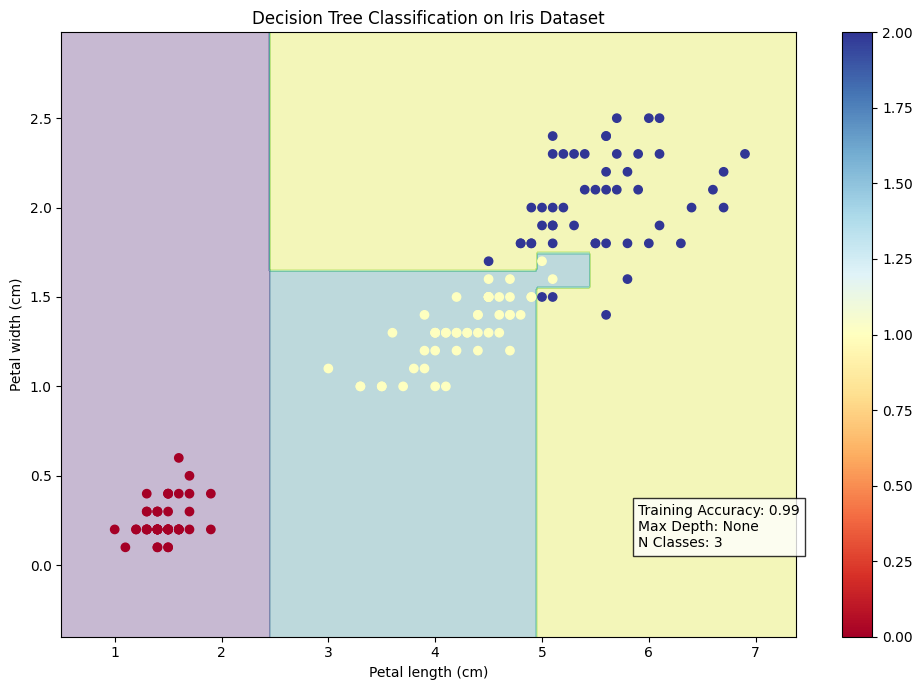


Feature Importance:
Petal Length: 0.5716783359446403
Petal Width: 0.4283216640553596


In [6]:
# Create and train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=None)
tree_clf.fit(X, y)

# Create a mesh grid to plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    # Set min and max values with some padding
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Make predictions for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create color plot
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.title(title)
    plt.colorbar(scatter)
    
    # Show decision tree details
    n_classes = len(np.unique(y))
    training_accuracy = model.score(X, y)
    plt.text(x_max - 1.5, y_min + 0.5, 
            f'Training Accuracy: {training_accuracy:.2f}\n'
            f'Max Depth: {model.max_depth}\n'
            f'N Classes: {n_classes}',
            bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, tree_clf, 'Decision Tree Classification on Iris Dataset')

# Print feature importance
print("\nFeature Importance:")
print("Petal Length:", tree_clf.feature_importances_[0])
print("Petal Width:", tree_clf.feature_importances_[1])

## Decision Boundaries and Classification Models

### 1. Types of Decision Boundaries

#### Decision Trees
- Places orthogonal (perpendicular) decision boundaries in feature space
- Binary tree decision tree model specifically uses orthogonal boundaries
- Can be modified to use non-orthogonal boundaries:
  - By using 2 features at each node instead of one
  - Results in slanted decision lines
  - This variation is known as ID3 model
  - Note: Not available in scikit-learn, requires custom implementation

#### Logistic Regression
- Places a linear decision boundary in feature space:
  - 2D: Places a line in the plane
  - ND: Places a hyperplane (n-1 dimensional) in n-dimensional space
- Partitions feature space into exactly two parts
- Definition: Any model that partitions feature space into exactly two parts is considered a linear model

### 2. Important Concepts

#### Linear Separability
- Data is considered "linearly separable" when it can be cleanly separated using a linear decision boundary
- VC dimension relates to:
  - The dimension of the hyperplane necessary to split the data
  - The space of the hyperplane required

#### Decision Tree Characteristics
- Has infinite capacity for splitting training data
- Uses Gini index minimization to place decision boundaries
- Particularly effective for:
  - Tabular datasets
  - When combined with boosting techniques

### 3. Model Comparison
| Model Type | Decision Boundary Type | Space Partition |
|------------|----------------------|-----------------|
| Binary Decision Tree | Orthogonal | Multiple parts |
| ID3 Model | Non-orthogonal (slanted) | Multiple parts |
| Logistic Regression | Linear hyperplane | Two parts |

## Decision Tree Optimization and Split Finding

### 1. Optimization Approaches for Decision Trees

#### Exact Split Calculation Method
1. **Sorting-Based Approach**
   - Sort the data points first
   - Only examine midpoints between adjacent data points
   - For 150 data points → 149 possible split points
   - Advantages:
     - Provides exact splits
     - More efficient than brute force
     - No loss in accuracy

2. **Implementation Details**
   - Applied to all features independently
   - At root node: 149 options per feature
   - Number of split points decreases at lower nodes due to fewer data points
   - Used in scikit-learn implementation

#### Approximate Split Methods
1. **Histogram-Based Splitting**
   - Calculate histogram on feature axis
   - Identifies data distribution and sparse regions
   - Uses histogram bins to determine approximate splits
   - Example: Using bins like 1-2, 2-3, etc., with splits at 1.5, 2.5, etc.

2. **Applications in Modern Algorithms**
   - Powers popular boosting implementations:
     - XGBoost
     - CatBoost
     - LightGBM
   - Note: Not suitable for standalone trees due to accuracy loss

### 2. Computational Efficiency
- Original brute force approach: 1100 options to search
- Optimized midpoint approach: ~149 options
- Benefits:
  - Exact same results as brute force
  - Significantly reduced computation
  - Scale-independent performance

## Ensemble Learning

Ensemble learning addresses overfitting and single-model limitations by combining multiple weak learners into a stronger collective system. Following the Central Limit Theorem and Law of Large Numbers, this aggregated wisdom of base outperforms experts. This perfectly encapsulates ensemble learning's fundamental principle: combining multiple weak learners, each performing slightly better than random chance, can create a robust and accurate prediction system through collective decision-making.

### Professional Application Example

Consider a medical diagnosis system where multiple diagnostic models analyze patient data. Each model specializes in different aspects: one focuses on blood work, another on imaging results, and a third on patient history. While individual models might achieve 75% accuracy, combining their predictions through ensemble methods can push accuracy above 90%. This improvement occurs because each model captures different aspects of the diagnostic criteria, and their collective wisdom compensates for individual limitations. Similar to how audience members bring diverse perspectives to game show questions, these specialized models contribute unique insights to the final diagnosis. The ensemble approach also provides built-in redundancy and error checking, much like how multiple medical opinions often lead to more accurate diagnoses than single-doctor assessments. This example demonstrates how ensemble learning transcends from entertaining game show analogies to critical real-world applications where accuracy and reliability are paramount.

### Decision Trees and Ensemble Learning

- Train Decision Trees on random subsets of the training data.
- Make the final prediction as an average of all the trees.
- These multiple trees trained on random subsets are called as **random forests**.
- In case of regression problem, average of the predictions are taken. In case of classification problem, the prediction by most number of trees is taken. That is called as a **hard voting classifier**. A **soft voting classifier** aggregates the model predicitons. For instance suppose the probability of class $j$ by model $i$ is $p_{ij}$ then the total probability of class $j$ is $\sum_{i} p_{ij}$. Generally, a soft boost classifier is used.

### Bagging and Boosting Ensembles

Bagging (Bootstrap Aggregating) and Boosting are ensemble learning techniques that combine multiple models to improve predictive performance.

- **Bagging** focuses on reducing variance by training multiple models on different subsets of the training data (created via bootstrapping) and aggregating their predictions, typically through averaging for regression or voting for classification. Random Forest is a common bagging algorithm.

- **Boosting** aims to reduce bias by training models sequentially, where each model corrects the errors of its predecessor. Weak learners, such as decision stumps, are combined to create a strong model. Algorithms like AdaBoost and Gradient Boosting exemplify this approach.

### Stacking Ensemble

**Stacking Ensemble** (or Stacked Generalization) is an advanced ensemble learning technique that combines multiple base models (level-0 models) with a meta-model (level-1 model) to make more accurate predictions.

- **How it works:** The base models are trained on the same dataset independently, and their predictions are used as input features for the meta-model.
- **Meta-Model Role:** The meta-model learns how to best combine the predictions of the base models, leveraging their strengths and compensating for their weaknesses.
- **Advantages:** Stacking can capture diverse patterns in the data by using heterogeneous models, often resulting in superior performance compared to individual models.
- **Use Cases:** It's commonly used in competitions like Kaggle due to its ability to boost performance with a diverse set of models.

Stacking is particularly effective when the base models are diverse and uncorrelated.

### Hyperparameters in Ensemble Models

1. **Hyperparameters to Choose:**
   - **Number of Trees:** Determines the size of the ensemble. More trees often improve performance but increase computational cost.
   - **Number of Samples per Tree:** Controls the subset of data each tree uses for training, impacting model diversity and overfitting.
   - **Tree Depth:** Limits how complex each tree can grow. Shallower trees reduce overfitting but may underfit the data.

### Feature importance

Feature importance in a Random Forest (RF) or Decision Tree (DT) quantifies the contribution of each feature to the prediction performance of the model. Here's how it is typically calculated:

1. **Decision Tree Perspective:**
   - Feature importance is based on how much a feature reduces impurity (e.g., Gini Index or Entropy) in the splits it participates in.
   - For each split, the weighted reduction (weights proportional to the number of samples reaching that node) in impurity is calculated, and this value is attributed to the feature used in the split. The feature importance scores are normalized so that they add upto $1$.
   - The total importance of a feature in a tree is the sum of all reductions in impurity attributed to that feature across the tree.

2. **Random Forest Perspective:**
   - Since a Random Forest is an ensemble of trees, the feature importance for the forest is computed as the average importance of the feature across all the individual trees.
   - This helps to smooth out biases and provide a more robust importance measure.

3. **Out-of-Bag (OOB) Score (Optional in RF):**
   - A permutation-based method is often used to estimate feature importance. The values of a feature are shuffled, and the impact on model performance is measured.
   - A significant drop in performance after shuffling indicates that the feature is important.

Feature importance reflects how much a feature contributes to making accurate predictions, either through impurity reduction in trees or the impact on model performance when perturbed.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=600, max_depth=2, n_jobs=-1) # n_jobs = -1 means using all processors

# Train the model
rnd_clf.fit(iris["data"], iris["target"])

RandomForestClassifier(max_depth=2, n_estimators=600, n_jobs=-1)

In [8]:
for name, importance in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(f"{name}: {importance}")

sepal length (cm): 0.09894719827869235
sepal width (cm): 0.004885826685215339
petal length (cm): 0.4510581277969539
petal width (cm): 0.4451088472391383


In [9]:
# Print the accuracy of the model
print("\nModel Accuracy:")
print(rnd_clf.score(iris["data"], iris["target"]))


Model Accuracy:
0.96



Model Accuracy:
0.9933333333333333


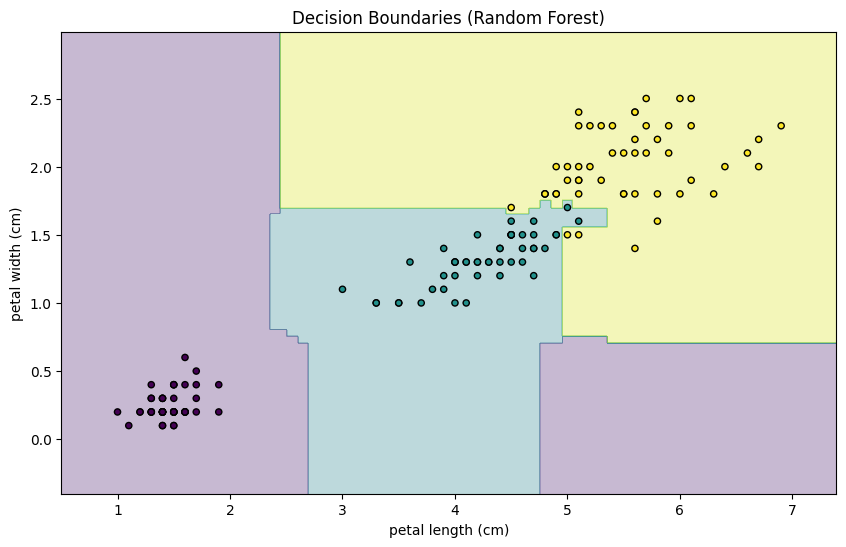

In [10]:
# Select only two features for both training and visualization
X = iris.data[:, [2, 3]]  # petal length and petal width
y = iris.target

# Create and train the model on just these two features
rnd_clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rnd_clf.fit(X, y)  # Train with only 2 features

# Print the accuracy of the model
print("\nModel Accuracy:")
print(rnd_clf.score(X, y))

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = rnd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel(iris.feature_names[2])  # petal length
plt.ylabel(iris.feature_names[3])  # petal width
plt.title("Decision Boundaries (Random Forest)")
plt.show()

### Permutation Feature Importance Algorithm

The algorithm takes as input a fitted predictive model $m$ and a tabular dataset $D$ (which can be either training or validation data). The process begins by computing a reference score $s$ of the model $m$ on the original data $D$ - this could be accuracy for a classifier or $R^2$ for a regression model. Then, for each feature $j$ (column in $D$), the algorithm performs $K$ repetitions of the following steps: First, it creates a corrupted version of the dataset $D_{k, j}$ by randomly shuffling column $j$ while keeping other features intact. Next, it computes a new score $s_{k, j}$ of model $m$ on this corrupted dataset $D_{k, j}$. The importance $i_j$ for feature $j$ is then calculated as the difference between the original reference score and the average of these permuted scores: $$i_j = s - \frac{1}{K} * \sum_{k = 1}^{K} s_{k,j}$$ This final importance score represents how much model performance degrades when the feature is randomized - a higher value indicates a more crucial feature for the model's predictions.
Remark: Permutation feature importance is useful even when the training datasetis skewed.

Base model accuracy: 1.000

Feature Importance Rankings:
petal length (cm): 0.318 ± 0.034
petal width (cm): 0.150 ± 0.024
sepal length (cm): 0.012 ± 0.007
sepal width (cm): 0.010 ± 0.005


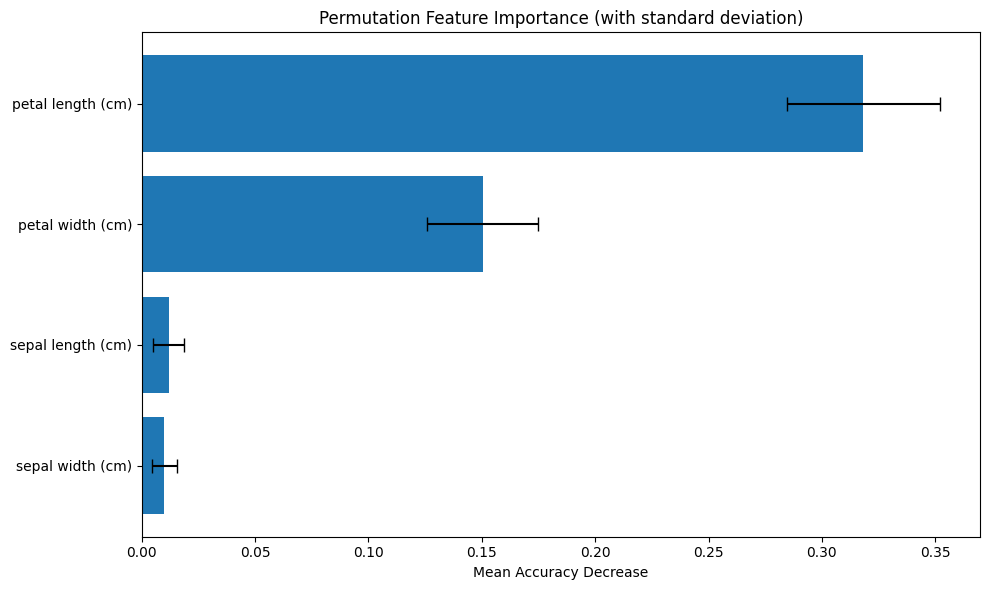

In [11]:
from sklearn.inspection import permutation_importance

X = iris.data
y = iris.target
feature_names = iris.feature_names

# Train the model with all features
rnd_clf = RandomForestClassifier(
    n_estimators=600,
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rnd_clf.fit(X, y)

# Calculate base score
base_score = rnd_clf.score(X, y)
print(f"Base model accuracy: {base_score:.3f}")

# Calculate permutation importance
result = permutation_importance(
    rnd_clf, X, y,
    n_repeats=20,
    random_state=42,
    n_jobs=-1
)

# Sort features by importance
feature_importance = result.importances_mean
feature_std = result.importances_std
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Create visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Create horizontal bar plot
ax.barh(pos, feature_importance[sorted_idx], 
        xerr=feature_std[sorted_idx],
        align='center',
        capsize=5)

# Customize the plot
ax.set_yticks(pos)
ax.set_yticklabels(np.array(feature_names)[sorted_idx])
ax.set_xlabel('Mean Accuracy Decrease')
ax.set_title('Permutation Feature Importance (with standard deviation)')

# Print numerical results
print("\nFeature Importance Rankings:")
for idx in reversed(sorted_idx):
    print(f"{feature_names[idx]}: {feature_importance[idx]:.3f} ± {feature_std[idx]:.3f}")

plt.tight_layout()
plt.show()

## Metrics for Performance

### Understanding Confusion Matrix in Classification

Let's understand confusion matrices through a simple email classification example (Spam vs Not Spam).

### Basic Concept
A confusion matrix for binary classification is a 2x2 table showing the match between predicted and actual outcomes:

|               | Predicted: Spam | Predicted: Not Spam |
|---------------|-----------------|-------------------|
| Actual: Spam     | 80 (TP)        | 20 (FN)          |
| Actual: Not Spam | 10 (FP)        | 90 (TN)          |

#### Key Metrics:
- **True Positives (TP)**: 80 spam emails correctly identified as spam
- **False Negatives (FN)**: 20 spam emails incorrectly marked as not spam
- **False Positives (FP)**: 10 non-spam emails incorrectly marked as spam
- **True Negatives (TN)**: 90 non-spam emails correctly identified as not spam

#### Performance Metrics:
1. **Accuracy** = (TP + TN) / Total
   - (80 + 90) / 200 = 0.85 or 85%
   
2. **Precision** = TP / (TP + FP)
   - 80 / (80 + 10) = 0.89 or 89%
   - "When model says spam, it's right 89% of the time"
   - Specificity = FN / (FP + TN) is the precision of the negative class
   
3. **Recall** = TP / (TP + FN)
   - 80 / (80 + 20) = 0.80 or 80%
   - "Model catches 80% of all actual spam"
   - False Negative Rate = 1 - Recall

4. **F1-Score** = 2 * (Precision * Recall) / (Precision + Recall)
   - Balanced measure between precision and recall

Unlike regression where RMSE gives a single error value, confusion matrices show exactly where and how the model makes mistakes, making them invaluable for model evaluation and improvement.

## Understanding PR and ROC Curves in Classification

### PR (Precision-Recall) Curve

The Precision-Recall curve shows the tradeoff between precision (positive predictive value) and recall (sensitivity) at various classification thresholds. For each threshold, we plot precision (y-axis) against recall (x-axis). The curve starts at (1,0) and ends at (0,1). A perfect classifier would have a curve that reaches the top-right corner (1,1). PR curves are particularly useful for imbalanced datasets where negative class is much larger than positive class. The Area Under PR Curve (AUPRC) summarizes the curve's performance - higher is better.

### ROC (Receiver Operating Characteristic) Curve

The ROC curve plots True Positive Rate (Sensitivity/Recall) against False Positive Rate (1-Specificity) at various thresholds. Starting at (0,0), it moves to (1,1), with better classifiers curving towards the top-left corner. The Area Under ROC Curve (AUC-ROC) ranges from 0 to 1, where 0.5 represents random guessing and 1.0 is perfect classification. ROC curves are threshold-independent and show how well the model can distinguish between classes. Unlike PR curves, ROC curves can be misleading for imbalanced datasets as they give equal weight to false positives and false negatives.

Key Difference: PR curves focus on performance on the positive class (good for imbalanced data), while ROC curves show overall classification performance across all thresholds but can be overly optimistic with imbalanced data.

Remark: Both the curves are obtained by changing the threshold on the probability for classification.

<p align="center">
  <img src="https://i.imgur.com/GlZipKs.png" alt="Image" />
</p>

### ROC AUC for Multi Class

#### Micro vs Macro Averaging in ROC Analysis

#### Key Distinctions
1. **Micro-Average**
   - Treats all instances equally regardless of class
   - Aggregates true positives, false positives, and false negatives globally

2. **Macro-Average**
   - Weights each class equally regardless of size
   - Calculates metrics per class, then takes arithmetic mean

<p align="center">
  <img src="https://i.imgur.com/53qsZm6.png" alt="Image" />
</p>


### Development Testing Paradigm

The Development-Testing Paradigm in machine learning provides a structured approach to model building and validation. For a dataset with m rows and n columns, the development set (X1) is used for both model training (parameter estimation, tree construction) and development (hyperparameter tuning via K-Fold Cross Validation). The final testing phase evaluates the model on completely unseen data to estimate real-world performance, ensuring proper generalization and preventing overfitting by maintaining strict separation between development and testing phases.

### K-Fold Cross Validation

K-Fold Cross Validation is a robust model evaluation technique where the dataset is divided into $k$ equal parts, with each fold serving as a validation set once while the remaining folds form the training set. In this iterative process, each fold takes turns being the validation set, while the other folds are used for training, resulting in $k$ different performance metrics. The final performance estimate is calculated as the average of all $k$ iterations' performance metrics (Performance $= \frac{1}{K} \sum$ Performance_i), providing a more reliable assessment of the model's generalization capability than a single train-test split.

Fitting 10 folds for each of 36 candidates, totalling 360 fits

Best Parameters:
max_depth: 3
min_samples_split: 2
n_estimators: 100

Best cross-validation score: 0.958

Held-out test set score: 0.967


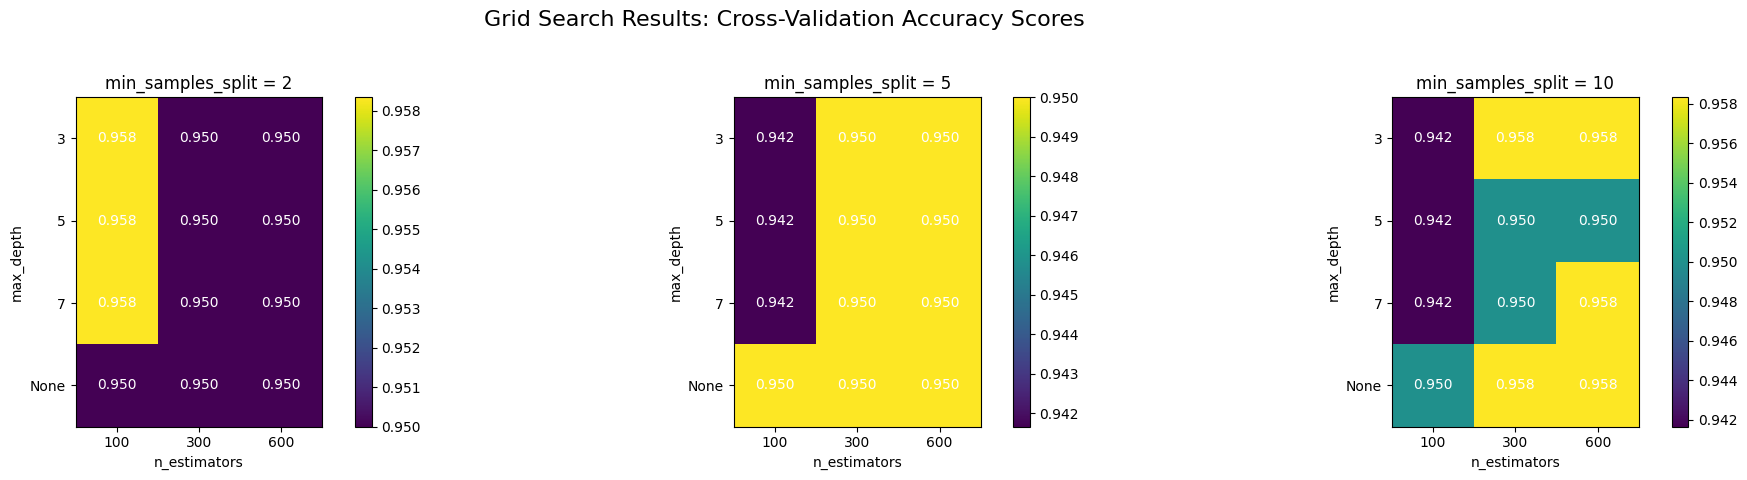

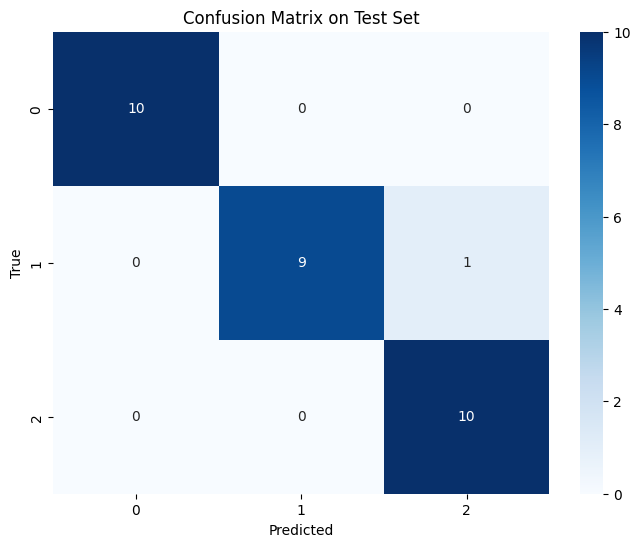


Classification Report on Test Set:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Overfitting Analysis:

Top 5 Models by Validation Score:
                                                               Params  Train Score  Validation Score  Difference
0       {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}     0.987037          0.958333    0.028704
3       {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}     0.985185          0.958333    0.026852
14      {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 600}     0.987037          0.958333    0.028704
6      {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}    

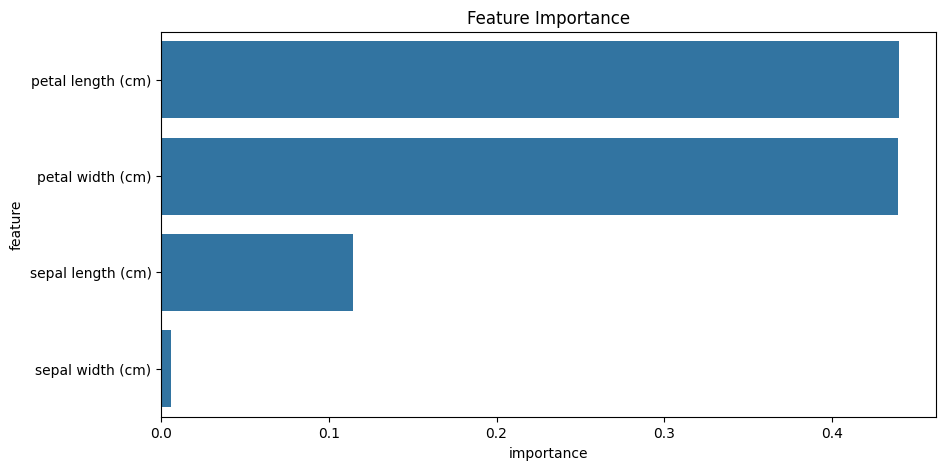

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 600],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

# Create base model
rf = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=10,  # 10-fold cross validation
    n_jobs=-1,
    scoring='accuracy',
    verbose=1,
    return_train_score=True  # This will allow us to check for overfitting
)

# Perform grid search on training data only
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("\nBest Parameters:")
print("================")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nBest cross-validation score: {grid_search.best_score_:.3f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"\nHeld-out test set score: {test_score:.3f}")

# Create visualization of parameter grid results
scores = grid_search.cv_results_['mean_test_score']
n_estimators = param_grid['n_estimators']
max_depths = param_grid['max_depth']
min_samples = param_grid['min_samples_split']

# Reshape scores for plotting
scores = scores.reshape(len(n_estimators), len(max_depths), len(min_samples))

# Create subplots for each min_samples_split value
fig, axes = plt.subplots(1, len(min_samples), figsize=(20, 5))
fig.suptitle('Grid Search Results: Cross-Validation Accuracy Scores', fontsize=16)

for idx, min_split in enumerate(min_samples):
    im = axes[idx].imshow(scores[:, :, idx].T, interpolation='nearest', cmap='viridis')
    axes[idx].set_xlabel('n_estimators')
    axes[idx].set_ylabel('max_depth')
    axes[idx].set_title(f'min_samples_split = {min_split}')
    
    # Set tick labels
    axes[idx].set_xticks(np.arange(len(n_estimators)))
    axes[idx].set_yticks(np.arange(len(max_depths)))
    axes[idx].set_xticklabels(n_estimators)
    axes[idx].set_yticklabels(['3', '5', '7', 'None'])
    
    # Add colorbar
    plt.colorbar(im, ax=axes[idx])
    
    # Annotate scores
    for i in range(len(n_estimators)):
        for j in range(len(max_depths)):
            axes[idx].text(i, j, f'{scores[i, j, idx]:.3f}',
                         ha='center', va='center', color='white')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create confusion matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("\nClassification Report on Test Set:")
print("==================================")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Check for overfitting by comparing train and test scores
print("\nOverfitting Analysis:")
print("====================")
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']
score_difference = train_scores - test_scores

# Create DataFrame with all results
results_df = pd.DataFrame({
    'Params': grid_search.cv_results_['params'],
    'Train Score': train_scores,
    'Validation Score': test_scores,
    'Difference': score_difference
})

# Sort by validation score and show top 5
print("\nTop 5 Models by Validation Score:")
print(results_df.sort_values('Validation Score', ascending=False).head().to_string())

# Feature importance of best model
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

### Hyperparameter Tuning

The above code snippet showed the brute force searching **grid search hyperparameter tuning**. **Bayesian optimization** is an efficient technique for hyperparameter tuning that avoids the exhaustive evaluation of all possible parameter combinations, such as in grid search, and instead relies on probabilistic methods to explore the search space intelligently. The process begins with the random selection of an initial hyperparameter combination from a large grid. This serves as the starting point for constructing a Markov Chain, where subsequent steps are guided by Monte Carlo simulations. These simulations evaluate the performance of neighboring hyperparameter combinations, identified through a proposal distribution. The proposal distribution generates candidate hyperparameters that are likely to improve performance based on the current state. Each candidate is evaluated using $K$-fold cross-validation to assess its impact on key metrics, such as variance reduction and mean performance improvement. If a candidate shows better performance, it is accepted as the next point in the Markov Chain. This iterative process, known as Markov Chain Monte Carlo (MCMC), balances exploration and exploitation of the hyperparameter space, using acceptance criteria to determine whether to adopt a proposed candidate. By focusing computational effort on promising areas of the search space, Bayesian optimization using MCMC improves efficiency and achieves optimal results without brute force evaluations, making it a powerful tool for machine learning model tuning.

Imagine tuning a random forest model with hyperparameters `n_estimators` and `max_depth`. Bayesian optimization starts by picking a random point in the grid, say `n_estimators = 50` and `max_depth = 10`. It then evaluates neighboring points, like `n_estimators = 60` and `max_depth = 12`, based on a surrogate model that predicts performance. If a neighbor improves performance, it becomes the new focus, and the process continues, efficiently honing in on the best hyperparameter combination.

#### Multi-Objective Search

In multi-objective search, the goal is to optimize multiple conflicting objectives simultaneously, such as maximizing accuracy while minimizing model complexity. Instead of a single solution, the search yields a Pareto front—a set of optimal trade-offs where improving one objective worsens another. Techniques like Bayesian optimization or genetic algorithms evaluate candidate solutions iteratively, balancing exploration and exploitation to identify points along the Pareto front. Further weights can be assigned to different metrics.

### Deployment of a Model

Once the best hyperparameters are identified, you can:

1. **Train on the Entire Development Set**: Using the chosen hyperparameters, train a final model on the entire development set, ensuring no faults in the process. This produces a single high-performing model ready for deployment and evaluation on the test set.

2. **Deploy an Ensemble**: Instead of a single model, train multiple models with the same or varied hyperparameter combinations. For example:
   - Use one hyperparameter combination to train multiple models (e.g., 10 forests) and average their outputs.
   - Select two competing hyperparameter combinations, train multiple models for each, and create an ensemble of all trained models (e.g., 20 models).

3. **Optimize for Competitive Performance**: In highly competitive scenarios, such as Kaggle competitions, fine-tuning beyond hyperparameters becomes critical. Tricks include:
   - **Tuning Random Seeds**: Adjusting random seeds to account for variability in training outcomes.
   - **Precision Optimization**: Using ensembles and fine adjustments to maximize performance down to the third or fourth decimal place.

These practical enhancements, while beyond standard theory, can provide the edge needed in competitive machine learning environments.

### Issues with DT
- Decision trees produce orthogonal decision boundaries
- Hence, rotating data makes DT unnecessarily convoluted
- Decision Trees are very sensitive to small variations in the training data
- Removing an outlier data point may drastically change the DT
- Random forests and XGBoost can overcome this instability by ensemble learning

### Training the model

A dataset $D$ is split into $D_{\text{train}}$, $D_{\text{val}}$ and $D_{\text{test}}$. Suppose $\theta$ is the parameter, $\alpha$ is the hyperparameter, $L$, $V$ and $T$ are the training, validation and test loss functions respectively. 

1. The process of training is to minimize $L(D_{\text{train}}, \theta, \alpha) \implies \theta^* = \arg\min L(D_{\text{train}}, \theta, \alpha)$.
2. Hyperparameter tuning is $\alpha^* = \arg\min V(D_{\text{val}}, \theta^*, \alpha)$.
3. $\theta^*, \alpha^*$ defines the model. Alongwith this, $T(D_{\text{test}}, \theta^*, \alpha^*)$ is reported as well.

### Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning that describes the relationship between a model's error and its complexity. The total error of a model can be decomposed into three components: bias, variance, and irreducible error, expressed mathematically as Error = $E[(y - ŷ)²]$ (RMSE) or more specifically as Error = $(E[ŷ] - y)^2 + E[(ŷ - E[ŷ])^2] + \sigma^2_e$.

Bias represents the error introduced by erroneous assumptions in the model's learning algorithm. A model with high bias tends to underfit the data, demonstrating limited flexibility to learn from the training data. This is analogous to making overly simplistic assumptions that result in a biased perspective. Conversely, variance refers to the model's sensitivity to small fluctuations in the training data. High variance leads to overfitting, where the model has excessive flexibility and essentially memorizes the training data. In such cases, the model learns the noise in the training data so thoroughly that each parameter becomes specifically tuned to individual data points, causing wild fluctuations when presented with new data.

The relationship between these components is illustrated by the classic U-shaped curve of the bias-variance tradeoff. As model complexity increases, bias typically decreases (as the model becomes more flexible), but variance increases (as the model becomes more sensitive to training data variations). The optimal model complexity occurs at the point where the sum of bias² and variance is minimized, representing the best balance between underfitting and overfitting. This is visually demonstrated through target diagrams, where the spread of predictions (yellow dots) around the true value (blue dot) shows different combinations of high/low bias and variance, helping to illustrate how these components contribute to overall model performance.

<div align="center">
  <img src="https://i.imgur.com/qxU25mT.png" alt="Training test curves showing typical patterns of overfitting and underfitting">
</div>

### Regularization

Decision Trees (DTs) represent a class of non-parametric models in machine learning, distinguished by their flexible structure that doesn't rely on a pre-defined number of parameters, unlike parametric models such as linear regression. This flexibility, while powerful, makes DTs particularly susceptible to overfitting when dealing with complex training data. To mitigate this risk, regularization techniques are employed through various hyperparameters that constrain the tree's growth and complexity.

The key hyperparameters used for regularization include: max_depth, which limits the maximum number of levels in the tree; min_samples_split, which specifies the minimum number of samples required at a node before it can be split; min_samples_leaf, which sets the minimum number of samples required at a leaf node; min_weight_fraction_leaf, which is similar to min_samples_leaf but expressed as a fraction of the total weighted instances; max_leaf_nodes, which restricts the maximum number of leaf nodes; and max_features, which controls the maximum number of features that can be evaluated for splitting at each node.

The process of regularization can be fine-tuned by adjusting these hyperparameters in two ways: either by increasing the minimum thresholds (min_ parameters) or by decreasing the maximum thresholds (max_ parameters). Both approaches effectively constrain the model's complexity and help prevent overfitting. Alternatively, one can adopt a post-pruning approach, where the tree is initially built without restrictions and then pruned back to achieve optimal performance. This two-step strategy offers another method for balancing model complexity with predictive accuracy.